**Note:** This is the base noteboook for task design. It includes both persist and pandas ask instructions

# Analyzing Video Games Across Genres

**Participant ID:**  P2
**Date / Time:** 11/16/23 - 11:30am

# Introduction
Welcome to our data analysis study. For this study, you'll be working with a dataset sourced [Corgis Datasets Project](https://corgis-edu.github.io/corgis/).

The data was originally published in the publication [“What makes a blockbuster video game? An empirical analysis of US sales data.” Managerial and Decision Economics](https://researchportal.port.ac.uk/en/publications/what-makes-a-blockbuster-video-game-an-empirical-analysis-of-us-s) by Dr Joe Cox. 

The dataset has information about the sales and playtime of over a thousand video games released between 2004 and 2010. The playtime information was collected from crowd-sourced data on ["How Long to Beat"](https://howlongtobeat.com/).

- You will use pandas to complete **data cleanup and manipulation** tasks.
- Pandas is set up and ready for use, along with other Python libraries such as Matplotlib, Seaborn,
- and Altair for data visualization.
- You are allowed to use internet resources like documentation and forums, including Stack Overflow, to assist you in completing the tasks.
- Carefully follow the step-by-step instructions provided for each task.
- In some cases, you will be asked to document your findings. Please do this in writing in a markdown cell.
- As you work through the tasks, take note of any interesting findings or challenges with the software or pandas that you may encounter, either by speaking your thoughts out loud or taking notes in a markdown cell.
- Feel free to add new code and markdown cells in the notebook as necessary to complete the tasks.


**Support**
- If you require assistance or need further clarification on any of the tasks, please let us know.
- If you find yourself stuck on a task and feel that you will not make any progress, you have the option to skip the task.
- For tasks that build upon the outputs of previous tasks, skipping a task might affect your ability to proceed. If you choose to skip a task, we can assist you by providing the necessary dataset or outputs required for the consecutive tasks.

In [2]:
import helpers as h
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

## Data Description

The table below describes the different columns in the dataset. Each row in the dataset represents a video game.

| Column        | Description                                                                                                                                                           |
|---------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Title         | Full title of the game.                                                                                                                                               |
| Handheld      | Whether this is a hand-held game.                                                                                                                                     |
| Max Players   | The maximum number of players that can play this game.                                                                                                                |
| Multiplatform | Whether this game is available on multiple platforms.                                                                                                                 |
| Online        | Whether this game supports online play.                                                                                                                               |
| Genres        | The main genre that this game belongs to.                                                                                                                             |
| Licensed      | Whether this game was based off a previously licensed entity.                                                                                                         |
| Publishers    | The publishers who created this game.                                                                                                                                 |
| Sequel        | Whether this game is a sequel to another game.                                                                                                                        |
| Review Score  | A review score for this game, out of 100.                                                                                                                             |
| Sales         | The total sales made on this game, measured in millions of dollars.                                                                                                   |
| Used Price    | A typical "used" price for this game (i.e. previously returned and sold), measured in dollars.                                                                        |
| Console       | The name of the console that this particular game was released for. Note that the dataset contains multiple copies of the same game, released for different consoles. |
| Rating        | The ESRB rating for this game, either E (for Everyone), T (for Teen), or M (for Mature).                                                                              |
| Re-release    | Whether this game is a re-release of an earlier one.                                                                                                                  |
| Year          | The year that this game was released.                                                                                                                                 |
| CT_All        | The median time that players reported completing the game in any way, in hours. This is the median over all the other categories.                                     |
| CT_Comp       | The median time that players reported completing everything in the game, in hours.                                                                                    |
| CT_MainExtra  | The median time that players reported completing the main game and major extra parts of the game, in hours.                                                           |
| CT_MainOnly   | The median time that players reported completing the main game storyline, in hours.                                                                                   |

In [3]:
df = pd.read_csv('video_games.csv')
df.head()

,Title,Handheld?,Max Players,Multiplatform?,Online?,Genres,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Re-release?,Year,CT_All,CT_Comp,CT_MainExtra,CT_MainOnly
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,True,2004,24.48,30.00,25.00,14.50
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,True,2004,10.00,-100.00,9.75,10.00
2,WarioWare Touched!,True,2,True,True,Action,True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,True,2004,2.50,7.25,3.33,1.83
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,True,2004,-100.00,-100.00,-100.00,-100.00
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,True,2004,10.00,72.57,12.50,8.00


# Task 1: Column Names and Data Types

In the first task we will perform some basic data cleaning operations to get our dataset ready for further tasks.

### **Task 1a: Remove Columns**

Remove the following columns to streamline the dataset for further analysis:

- **_Re-release?:_** Boolean flag indicating if the game was a new release or a re-release.
- **_CT_All:_** Average of all other completition times, we will use one of the others directly

#### **Instructions**
1. **Column Removal:**
	- Remove the specified columns using Pandas commands.
2. **Generate dataframe:**
	- Assign the modified dataframe to variable `df_task_1a`
3. **Show Output:**
	- Print the head of `df_task_1a` to show the changes.

In [6]:
df_task_1a = df
df_task_1a = df_task_1a.drop(['Re-release?', 'CT_All'], axis=1)
df_task_1a.head()

,Title,Handheld?,Max Players,Multiplatform?,Online?,Genres,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,2004,30.00,25.00,14.50
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,2004,-100.00,9.75,10.00
2,WarioWare Touched!,True,2,True,True,Action,True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,2004,7.25,3.33,1.83
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,2004,-100.00,-100.00,-100.00
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,2004,72.57,12.50,8.00


### **Task 1b: Fix Column Names**

It looks like our dataset header went wrong when reading the file and some column headers end with a `?`. **Please remove the question marks from all headers**. 

#### **Instructions**
1. **Rename Columns:**
    - Employ Pandas commands to rename the columns, eliminating the trailing "?" as specified:
        - _Handheld?_ → _Handheld_
        - _Licensed?_ → _Licensed_
        - _Multiplatform?_ → _Multiplatform_
        - _Online?_ → _Online_
2. **Generate dataframe:**
    - Assign the updated dataframe to variable `df_task_1b`.
3. **Show Output:**
    - Print the head of `df_task_1b` to confirm the updated column names.

In [7]:
df_task_1b = df_task_1a

df_task_1b = df_task_1b.rename(columns={'Handheld?':'Handheld', 'Multiplatform?': 'Multiplatform', 'Online?':'Online', 'Licensed?': 'Licensed'} )

df_task_1b.head()

,Title,Handheld,Max Players,Multiplatform,Online,Genres,Licensed,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,2004,30.00,25.00,14.50
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,2004,-100.00,9.75,10.00
2,WarioWare Touched!,True,2,True,True,Action,True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,2004,7.25,3.33,1.83
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,2004,-100.00,-100.00,-100.00
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,2004,72.57,12.50,8.00


## **Task 1c: Correcting Data Type of 'Depth_inches'**

There is a data type issue in `Max Players` column of our dataframe. The column is a category column and should have the pandas dtype of `category`.

#### **Instructions**
1. **Convert `Max Players` column to category:**
    - Use pandas to switch data type of the `Max Players` column.
2. **Inspect unique values in `Max Players`:**
    - Print and inspect the column to note the redundant values (e.g. `1P`).
3. **Edit and Correct Entries:**
    - Edit the cells having an incorrect option to remove the trailing `P` (e.g. `1P` to `1`)
4. **Generate Dataframe:**
    - Assign the modified dataframe to a variable `df_task_1c`.
5. **Show Output:**
    - Display the dtypes of `df_task_1c` to verify the data type correction.

In [17]:
df_task_1c = df_task_1b

df_task_1c['Max Players'] = df_task_1c['Max Players'].astype('category')
df_task_1c['Max Players'] = df_task_1c['Max Players'].str.rstrip('P')
print(df_task_1c['Max Players'].unique())

# print(df_task_1c[10:100])

df_task_1c.head()

['1' '2' '4' '6' '7' '8']


,Title,Handheld,Max Players,Multiplatform,Online,Genres,Licensed,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,2004,30.00,25.00,14.50
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,2004,-100.00,9.75,10.00
2,WarioWare Touched!,True,2,True,True,Action,True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,2004,7.25,3.33,1.83
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,2004,-100.00,-100.00,-100.00
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,2004,72.57,12.50,8.00


# Task 2: Filtering data

In Task 2, we further improve our data by removing outliers and removing certain records to have more consistent data. 

## **Task 2a: Remove Outliers**

In this task, we address data accuracy by filtering out anomalies in the completion time for the main story of game. We observe some records with negative values for completion time, which is obviously incorrect data.

**Remove records with negative completion time.**

#### **Instructions**
1. **Locate Anomalous Data:**
    - Refer to the _seaborn_ scatterplot for `CT_MainOnly` vs `Review Score`
    - Write code to identify records where `CT_MainOnly` is negative.
3. **Remove Anomalies:**
    - Use Pandas commands to filter out these anomalous records from the dataframe.
4. **Generate Dataframe:**
    - Save the cleaned dataframe as `df_task_2a`.
5. **Plot Output:**
    - Recreate the scatterplot from step 1 in a new cell using `df_task_2a`.
    - Print the head of `df_task_2a`.

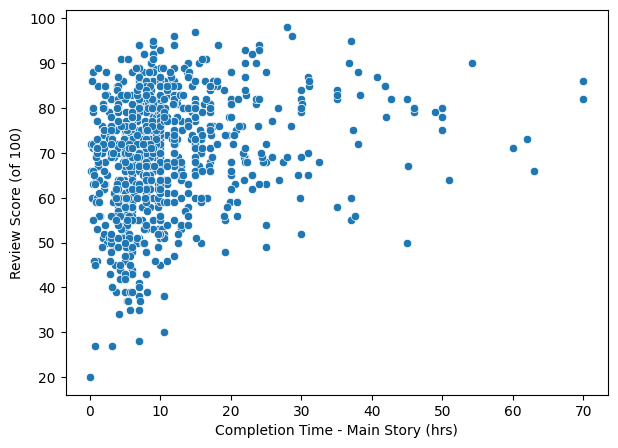

0.1


In [22]:
df_task_2a = df_task_1c

#### Scatterplot Code Start
df_task_2a = df_task_2a[df_task_2a['CT_MainOnly'] >= 0]
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_task_2a, x='CT_MainOnly', y='Review Score')

plt.xlabel('Completion Time - Main Story (hrs)')
plt.ylabel('Review Score (of 100)')

# df_task_2a = df_task_2a[df_task_2a['CT_MainOnly'] < 0]

# Display the plot
plt.show()

print(df_task_2a['CT_MainOnly'].min())

#### Scatterplot Code End

## **Task 2b: Filtering Out Old Data**

The interactive barchart below, shows the data aggregated by year. There are noticeably fewer records for `2004` and `2005`.

During this subtask we will remove these older records, keeping only the records post 2006.

#### **Instructions**
2. **Identify Sparse Years:**
    - Use the Seaborn plot with bar chart visualizing the number of video games released that year.
    - Based on the bar chart, identify years before `2006` with fewer records.
4. **Filter Out Sparse Years:**
    - Write Pandas code to exclude these years from the dataset.
5. **Show Output:**
    - Print the head of `df_task_2b` and recreate the bar chart to show the dataset focusing on years 2006 and onwards.


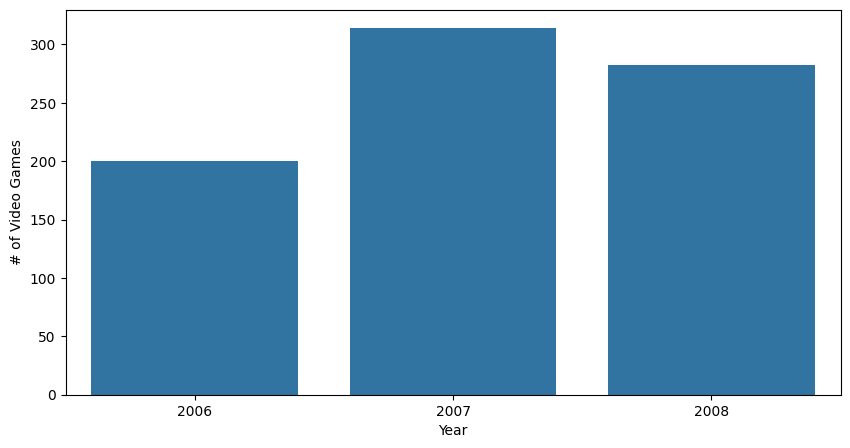

,Title,Handheld,Max Players,Multiplatform,Online,Genres,Licensed,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly
156,Wii Play,True,2,True,True,Action,True,Nintendo,True,58,14.66,14.95,Nintendo Wii,T,2006,-100.0,11.42,4.0
157,New Super Mario Bros.,True,1,True,True,Action,True,Nintendo,True,89,10.03,27.95,Nintendo DS,T,2006,15.5,10.0,7.0
158,Pokmon Diamond,True,1,True,True,Role-Playing (RPG),True,Nintendo,True,85,6.77,27.95,Nintendo DS,E,2006,220.0,80.0,41.92
159,Pokmon Pearl,True,1,True,True,Role-Playing (RPG),True,Nintendo,True,85,6.77,26.95,Nintendo DS,E,2006,220.0,80.0,41.92
160,Gears of War,True,2,True,True,Action,True,Microsoft,True,94,3.7,19.95,X360,M,2006,15.0,11.0,9.0


In [27]:
df_task_2b = df_task_2a
df_task_2b = df_task_2b.convert_dtypes()

#### Barchart Code Start

df_task_2b = df_task_2b[df_task_2b['Year'] >= 2006]

plt.figure(figsize=(10, 5))
sns.countplot(x=df_task_2b["Year"])

plt.xlabel('Year')
plt.ylabel('# of Video Games')

# Display the plot
plt.show()

#### Barchart Code End

df_task_2b.head()

## **Task 2c: Identifying top `Publishers` for `Genres` _'Racing'_ and _'RPG'_**

1. **Context:**
    - You are given two linked interactive bar charts: one for `Genres` (the major genre the game belongs to) and another for `Publishers` (the company which published the game first).
    - Both bar charts show `count` for their respective categories.
    - You can click on a genre in the `Genres` bar chart and the `Publishers`' bar chart dynamically updates to show only games corresponding to the selected genres.
2. **Identify the top publisher for _'Racing'_ and _'RPG'_:**
    - Analyze the filtered `Publishers` bar chart to determine the top publisher for the two genres and make a note in a markdown cell about both the name of the publisher and number of games published for each.

In [28]:
pts = alt.selection_point(name="selector", fields=["Genres"], bind="legend")

base = alt.Chart(df_task_2b).encode(y="count()")

genre = base.mark_bar().encode(
    y="Genres:N",
    x="count():Q",
    color=alt.condition(pts, "Genres:N", alt.value("#ddd")),
    tooltip="count()"
).add_params(pts).properties(width=500)

publishers = base.mark_bar().encode(
    x="Publishers:N",
    y="count():Q",
tooltip=["count()"]
).transform_filter(pts)

chart = alt.vconcat(
 publishers, genre
).resolve_scale(
    color="independent",
)

chart

alt.VConcatChart(...)

**Task 2c Notes:**

Top `Racing` Publisher: EA, 10 games


Top `RPG` Publisher: SquareEnix (14) (top known, unkown publishers have a higher count (23))

## Task 3: Data Wrangling

### **Task 3a: Creating and assigning `'Length'` category**

Next, we'll introduce a new categorical variable named `Length` into our dataset. This addition aims to classify each game into one of `Short`, `Average` and `Long` based on `CT_MainOnly` value.

Create a new category `Length` in the dataset and assign each record to `Short`, `Average` and `Long`.

#### **Instructions**
1. **Create New Variable:**
    - Add a new column `Length` to the DataFrame.
2. **Assign Category:**
    - Using the `CT_MainOnly` value assign proper values to the new category.
    - You should use the following ranges for assigning proper categories:
        - `Short`: 0 - 20 hours
    	- `Average`: 21 - 40 hours,
    	- `Long`: more than 40 hours
3. **Generate Dataframe:**
    - Save the modified DataFrame with the new `Length` category to `df_task_3a`.
4. **Show Output:**
    - Display the head of `df_task_3a` to confirm the addition and categorization of the new variable.

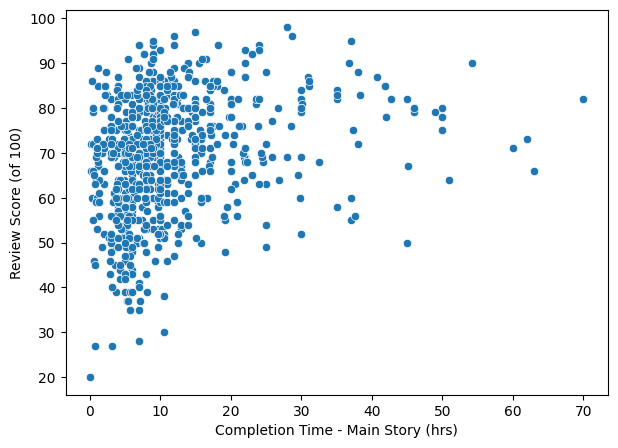

,Title,Handheld,Max Players,Multiplatform,Online,Genres,Licensed,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly,Length
156,Wii Play,True,2,True,True,Action,True,Nintendo,True,58,14.66,14.95,Nintendo Wii,T,2006,-100.0,11.42,4.0,Short
157,New Super Mario Bros.,True,1,True,True,Action,True,Nintendo,True,89,10.03,27.95,Nintendo DS,T,2006,15.5,10.0,7.0,Short
158,Pokmon Diamond,True,1,True,True,Role-Playing (RPG),True,Nintendo,True,85,6.77,27.95,Nintendo DS,E,2006,220.0,80.0,41.92,Long
159,Pokmon Pearl,True,1,True,True,Role-Playing (RPG),True,Nintendo,True,85,6.77,26.95,Nintendo DS,E,2006,220.0,80.0,41.92,Long
160,Gears of War,True,2,True,True,Action,True,Microsoft,True,94,3.7,19.95,X360,M,2006,15.0,11.0,9.0,Short


In [30]:
df_task_3a = df_task_2b

def bucket_length(time):
    if time <= 20:
        return 'Short'
    elif time <= 40:
        return 'Average'
    else:
        return 'Long'

df_task_3a['Length'] = df_task_3a['CT_MainOnly'].apply(bucket_length)

#### Scatterplot Code Start

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_task_3a, x='CT_MainOnly', y='Review Score')

plt.xlabel('Completion Time - Main Story (hrs)')
plt.ylabel('Review Score (of 100)')

# Display the plot
plt.show()

#### Scatterplot Code End

df_task_3a.head()

## **Task 3b: Finding Top Genre for each `Length`**

Now we will analyze which genre is most prevelant for games in each length category.

#### **Instructions**
1. **Analyze Genres by Length:**
	- Determine the most frequent genre for each length category.
2. **Present Findings:**
	- Note in markdown cell both the name of the genre and number of records for each length.

In [31]:
NEW_COLUMN = "Length"

selection = alt.selection_point(name="selector", fields=[f"{NEW_COLUMN}"], bind="legend")

chart = alt.Chart(df_task_3a).mark_bar().encode(
    x="Genres:N",
    y="count():Q",
    color=alt.Color(f"{NEW_COLUMN}:N").sort(["Short", "Average", "Long"]),
    opacity=alt.condition(selection,alt.value(1), alt.value(0.3)),
    order="selection_order:N",
    tooltip="count()"
).transform_calculate(
    selection_order=f"if(selector && selector['{NEW_COLUMN}'], if((datum['{NEW_COLUMN}'] === selector['{NEW_COLUMN}'][0]),0,1),0)"
).add_params(selection)

chart

alt.Chart(...)

**Task 3b Notes:**

Short (genre/count): action / 521

Average (genre/count): RPG / 34

Long (genre/count): RPG / 14